# Deviance information criterion

Following [Wikipedia](https://en.wikipedia.org/wiki/Deviance_information_criterion)

Deviance:

$D(\theta) = -2. \log (p(y, \theta)$

$\theta$ are the parameters, $y$ are the data, $p$ is the likelihood.

Effective number of parameters (from Gelman et al. 2004):

$p_D = 0.5 \cdot \overline{\mathrm{var}{D(\theta)}}$

Then,

$\mathrm{DIC} = p_D + \overline{D(\theta)}$

_reference_
Gelman, Andrew; Carlin, John B.; Stern, Hal S.; Rubin, Donald B. (2004). Bayesian Data Analysis: Second Edition. Texts in Statistical Science. CRC Press. ISBN 978-1-58488-388-3. 

In [29]:
import numpy as np
import pandas as pd

import emcee

import os
CWD = "/".join(os.getcwd().split("/")[:-2])


import matplotlib.pyplot as plt
%matplotlib inline

#from funcs.flarefit import log_probability, log_probability_2flares, log_probability_2flares2ars

/usr/lib64/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib64/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib64/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
NumExpr defaulting to 8 threads.


In [48]:
def deviance(lps):
    return -2.* lps

def pD(lps):
    d = deviance(lps)
    return 0.5*np.nanmean(np.nanvar(d))

def DIC(lps):
    return pD(lps) + np.nanmean(deviance(lps))

In [66]:
ID = 237880881##212035340 #230120143#
tstamp = [("11_02_2020_10_07", 9) , ("11_02_2020_11_16", 10)]


9 :  15871.87795854969
10 :  73518.15981536217


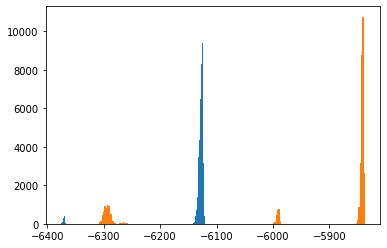

In [69]:
burnin = 40000
thin =50
for tst, nparam in tstamp:

    filename = f"{CWD}/analysis/results/mcmc/{tst}_{ID}b_MCMC.h5"
    reader = emcee.backends.HDFBackend(filename)

    log_prob_samples = reader.get_log_prob(discard=burnin, flat=True, thin=thin)

    plt.hist(log_prob_samples, bins=200);

    print(nparam, ": ", DIC(log_prob_samples))